1. 직원 ID : 각 직원을 식별하는 고유 식별자입니다.
2. 재직기간 : 직원이 회사에 근무한 연수.
3. 급여 : 직원의 연봉.
4. 부서 : 직원이 근무하는 부서(예: 영업, 회계, 고객 서비스).
5. 직무 만족도 : 직원이 스스로 보고한 직무 만족도 수준(1~5점 척도, 5점은 매우 만족스러움).
6. WorkLifeBalance : 직원이 스스로 보고한 워크라이프 밸런스 평가(1~5점 척도, 5점은 매우 좋음).
7. CommuteDistance : 직원이 직장으로 출퇴근하는 거리(예: 단거리, 중거리, 장거리).
8. 결혼 여부 : 직원의 결혼 여부(예: 미혼, 기혼, 이혼).
9. 학력 : 직원이 이수한 최종 학력(예: 고등학교, 학사, 석사).
10. 성과 평가 : 직원의 성과 평가(1~5점 척도, 5점은 매우 우수함).
11. TrainingHours : 직원이 받은 교육 시간 수.
12. 초과근무 : 직원이 초과근무를 하는지 여부.
13. 프로젝트 수 : 직원이 현재 작업 중인 프로젝트 수입니다.
14. YearsSincePromotion : 직원이 마지막으로 승진한 이후 경과한 연도입니다.
15. 환경 만족도 : 직원이 스스로 보고한 환경 만족도(1~5점 척도, 5점은 매우 만족)입니다.
16. 지점 : "지점" 기능은 미국 전역의 12개 Dunder Mifflin 지점 중 하나에 있는 각 직원의 지리적 위치를 나타냅니다.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import matplotlib.font_manager as fm
## 맥북용 한글
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 부호 깨짐 방지

In [24]:
df = pd.read_csv('data/office_churn_dataset.csv')
df.head()

,EmployeeID,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,MaritalStatus,Education,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,1,San Francisco,4.0,63000.0,Legal,3.0,3.0,Long,Married,High School,3.000000,88.0,True,3.0,0.0,2.0,Highly Likely to Churn
1,2,Chicago,14.0,72000.0,Accounting,4.0,4.0,Short,Single,Bachelor,3.666667,30.0,True,3.0,2.0,3.0,Moderately Likely to Churn
2,3,Miami,4.0,40000.0,Quality Assurance,3.0,3.0,Medium,Single,High School,3.666667,64.0,NaN,NaN,0.0,4.0,Highly Likely to Churn
3,4,Scranton,2.0,55000.0,Legal,3.0,3.5,Short,Married,Bachelor,3.666667,30.0,True,4.0,0.0,3.0,Moderately Likely to Churn
4,5,Scranton,10.0,55500.0,Legal,3.0,3.0,Medium,Married,Bachelor,3.333333,18.0,NaN,4.0,1.0,3.0,Moderately Likely to Churn


## 데이터 구조

In [25]:
df.info()
# 데이터 개수는 1543
# Branch, Tenure, Salary, JobSatisfaction, WorkLifeBalance, PerformanceRating, TrainingHours, OverTime, NumProjects, YearsSincePromotion, EnvironmentSatisfaction 컬럼에 결측치 있어보임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1543 non-null   int64  
 1   Branch                   1535 non-null   object 
 2   Tenure                   1534 non-null   float64
 3   Salary                   1534 non-null   float64
 4   Department               1543 non-null   object 
 5   JobSatisfaction          1515 non-null   float64
 6   WorkLifeBalance          1515 non-null   float64
 7   CommuteDistance          1543 non-null   object 
 8   MaritalStatus            1543 non-null   object 
 9   Education                1543 non-null   object 
 10  PerformanceRating        1536 non-null   float64
 11  TrainingHours            1352 non-null   float64
 12  OverTime                 1443 non-null   object 
 13  NumProjects              1444 non-null   float64
 14  YearsSincePromotion     

## 데이터 요약 및 기술통계

In [26]:
df.describe()

,EmployeeID,Tenure,Salary,JobSatisfaction,WorkLifeBalance,PerformanceRating,TrainingHours,NumProjects,YearsSincePromotion,EnvironmentSatisfaction
count,1543.000000,1534.000000,1534.000000,1515.000000,1515.000000,1536.000000,1352.000000,1444.000000,1542.000000,1515.000000
mean,772.000000,7.612125,66654.498044,3.421782,3.770770,3.493310,34.645646,3.500687,1.203632,2.521421
std,445.570047,4.123834,8473.622168,1.095047,0.481407,0.411208,22.970267,0.714107,2.059476,0.691325
min,1.000000,0.000000,40000.000000,1.000000,2.000000,1.639834,5.196002,1.505266,0.000000,1.000000
25%,386.500000,5.000000,61000.000000,3.000000,3.500000,3.333333,18.000000,3.000000,0.000000,2.000000
50%,772.000000,7.000000,66500.000000,3.000000,4.000000,3.363192,30.000000,3.618543,0.000000,2.780499
75%,1157.500000,10.000000,72375.000000,4.000000,4.000000,3.666667,40.000000,4.000000,2.000000,3.000000
max,1543.000000,27.000000,98000.000000,5.000000,5.000000,5.000000,96.000000,6.394718,16.000000,5.000000


In [27]:
print(df.value_counts('EmployeeID'), end='\n\n')
print(df.value_counts('Branch'), end='\n\n')
print(df.value_counts('Tenure'), end='\n\n')
print(df.value_counts('Salary'), end='\n\n')
print(df.value_counts('Department'), end='\n\n')
print(df.value_counts('JobSatisfaction'), end='\n\n')
print(df.value_counts('WorkLifeBalance'), end='\n\n')
print(df.value_counts('CommuteDistance'), end='\n\n')
print(df.value_counts('MaritalStatus'), end='\n\n')
print(df.value_counts('Education'), end='\n\n')
print(df.value_counts('PerformanceRating'), end='\n\n')
print(df.value_counts('TrainingHours'), end='\n\n')
print(df.value_counts('OverTime'), end='\n\n')
print(df.value_counts('NumProjects'), end='\n\n')
print(df.value_counts('YearsSincePromotion'), end='\n\n')
print(df.value_counts('EnvironmentSatisfaction'), end='\n\n')
print(df.value_counts('ChurnLikelihood'), end='\n\n')

EmployeeID
1       1
966     1
1036    1
1035    1
1034    1
       ..
513     1
512     1
511     1
510     1
1543    1
Name: count, Length: 1543, dtype: int64

Branch
Los Angeles      181
New York         180
Scranton         179
Philadelphia     166
Boston           165
Chicago          139
Seattle          101
San Francisco     95
Atlanta           90
Dallas            83
Denver            82
Miami             74
Name: count, dtype: int64

Tenure
6.0     163
5.0     160
4.0     154
8.0     150
7.0     145
3.0     133
9.0     110
10.0    100
11.0     67
2.0      62
12.0     61
13.0     53
14.0     49
1.0      30
15.0     26
16.0     21
17.0     10
18.0     10
19.0      8
20.0      8
21.0      4
22.0      4
24.0      2
23.0      2
0.0       1
27.0      1
Name: count, dtype: int64

Salary
66000.0    47
66500.0    44
70500.0    41
73000.0    39
65500.0    39
           ..
87500.0     1
46500.0     1
45000.0     1
43000.0     1
98000.0     1
Name: count, Length: 97, dtype: int64

Depart

## 결측치 및 이상치 탐색

In [28]:
# 불필요한 컬럼 제거
df = df.drop(['EmployeeID'], axis=1) # ID
df = df.drop(['MaritalStatus'], axis=1) # 결혼여부
df = df.drop(['Education'], axis=1) # 학력
df

,Branch,Tenure,Salary,Department,JobSatisfaction,WorkLifeBalance,CommuteDistance,PerformanceRating,TrainingHours,OverTime,NumProjects,YearsSincePromotion,EnvironmentSatisfaction,ChurnLikelihood
0,San Francisco,4.0,63000.0,Legal,3.0,3.000000,Long,3.000000,88.000000,True,3.000000,0.0,2.000000,Highly Likely to Churn
1,Chicago,14.0,72000.0,Accounting,4.0,4.000000,Short,3.666667,30.000000,True,3.000000,2.0,3.000000,Moderately Likely to Churn
2,Miami,4.0,40000.0,Quality Assurance,3.0,3.000000,Medium,3.666667,64.000000,NaN,NaN,0.0,4.000000,Highly Likely to Churn
3,Scranton,2.0,55000.0,Legal,3.0,3.500000,Short,3.666667,30.000000,True,4.000000,0.0,3.000000,Moderately Likely to Churn
4,Scranton,10.0,55500.0,Legal,3.0,3.000000,Medium,3.333333,18.000000,NaN,4.000000,1.0,3.000000,Moderately Likely to Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,Miami,6.0,58000.0,Research and Development,4.0,4.000000,Long,4.000000,12.000000,True,4.000000,0.0,3.000000,Highly Likely to Churn
1539,Boston,1.0,51500.0,Accounting,2.0,3.500000,Medium,3.666667,32.000000,True,4.000000,0.0,3.000000,Moderately Likely to Churn
1540,San Francisco,11.0,77500.0,Human Resources,4.0,4.029174,Long,3.819578,11.040847,True,4.122893,3.0,4.791749,Slightly Likely to Churn
1541,New York,NaN,81000.0,Research and Development,4.0,3.000000,Medium,3.000000,18.000000,True,3.000000,0.0,NaN,Highly Likely to Churn


In [29]:
df.isna().sum()
# Branch, Tenure, Salary, JobSatisfaction, WorkLifeBalance, PerformanceRating, TrainingHours, OverTime, NumProjects, YearsSincePromotion, EnvironmentSatisfaction 컬럼에 결측치 확인

Branch                       8
Tenure                       9
Salary                       9
Department                   0
JobSatisfaction             28
WorkLifeBalance             28
CommuteDistance              0
PerformanceRating            7
TrainingHours              191
OverTime                   100
NumProjects                 99
YearsSincePromotion          1
EnvironmentSatisfaction     28
ChurnLikelihood              0
dtype: int64

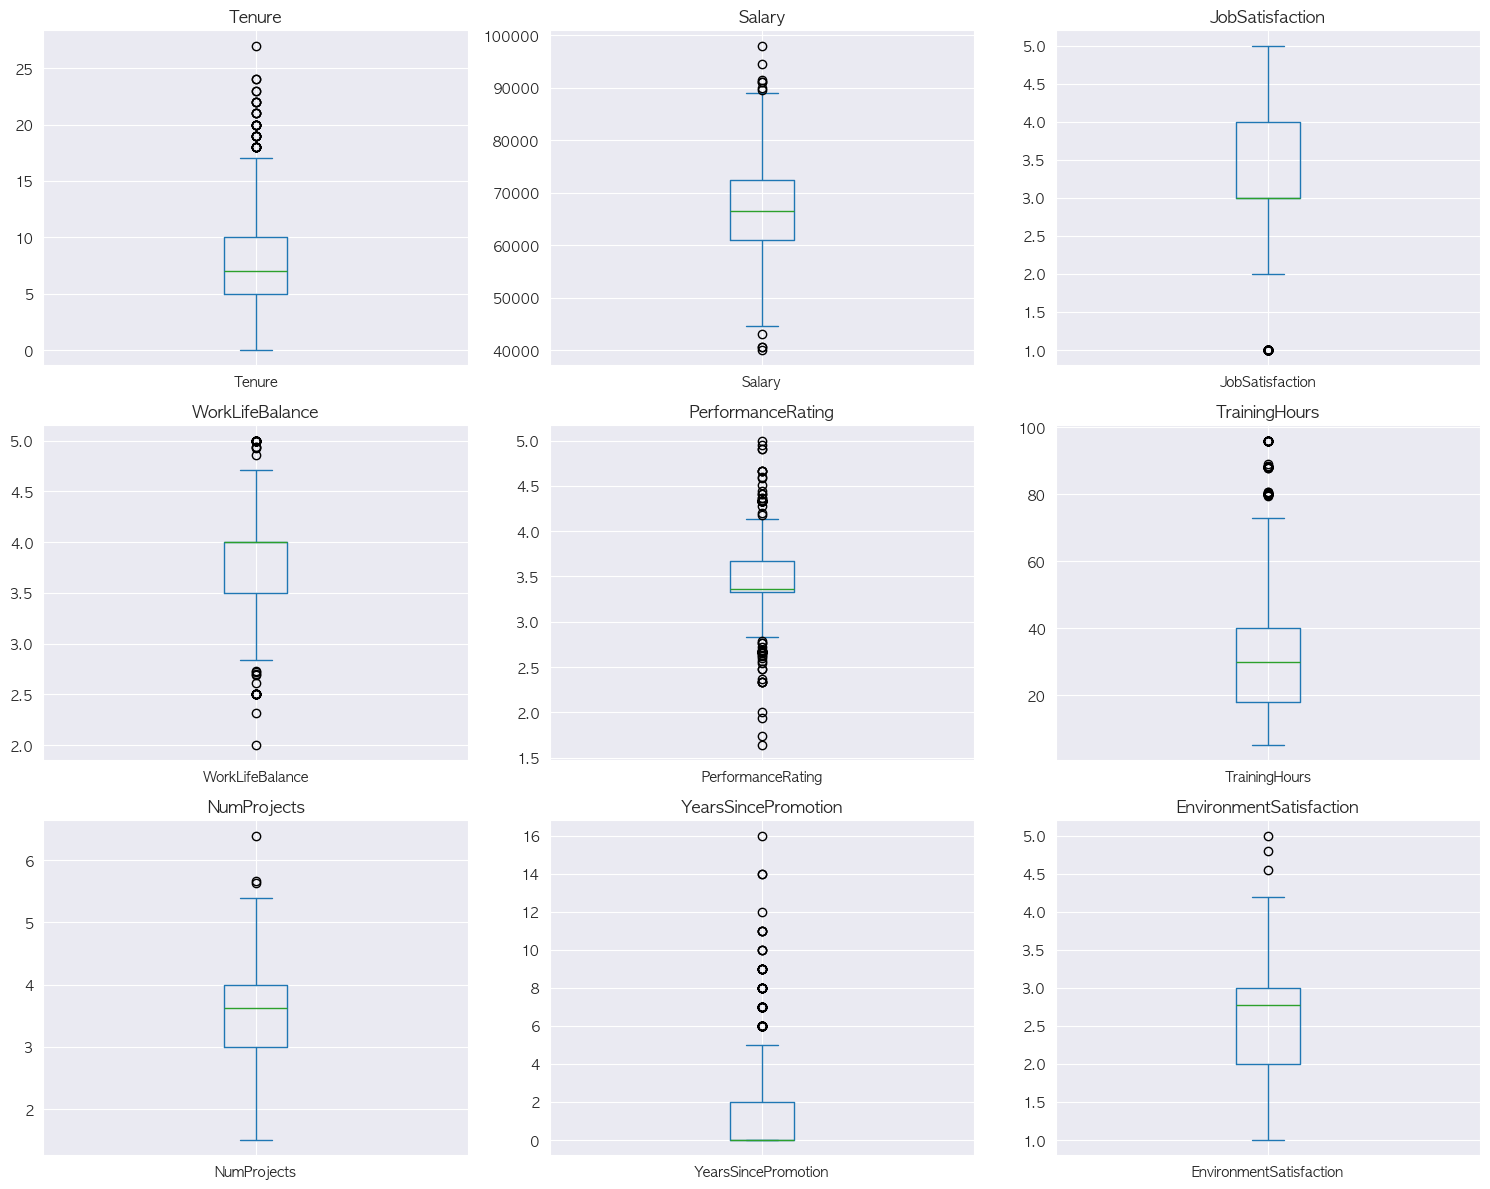

In [30]:
# 이상치 탐색

fig, ax = plt.subplots(3,3, figsize=(15, 12))

df['Tenure'].plot(kind='box', ax=ax[0][0], title='Tenure')
df['Salary'].plot(kind='box', ax=ax[0][1], title='Salary')
df['JobSatisfaction'].plot(kind='box', ax=ax[0][2], title='JobSatisfaction')
df['WorkLifeBalance'].plot(kind='box', ax=ax[1][0], title='WorkLifeBalance')
df['PerformanceRating'].plot(kind='box', ax=ax[1][1], title='PerformanceRating')
df['TrainingHours'].plot(kind='box', ax=ax[1][2], title='TrainingHours')
df['NumProjects'].plot(kind='box', ax=ax[2][0], title='NumProjects')
df['YearsSincePromotion'].plot(kind='box', ax=ax[2][1], title='YearsSincePromotion')
df['EnvironmentSatisfaction'].plot(kind='box', ax=ax[2][2], title='EnvironmentSatisfaction')

plt.tight_layout()  # 그래프 겹침 방지
plt.show()


## 변수분포 시각화

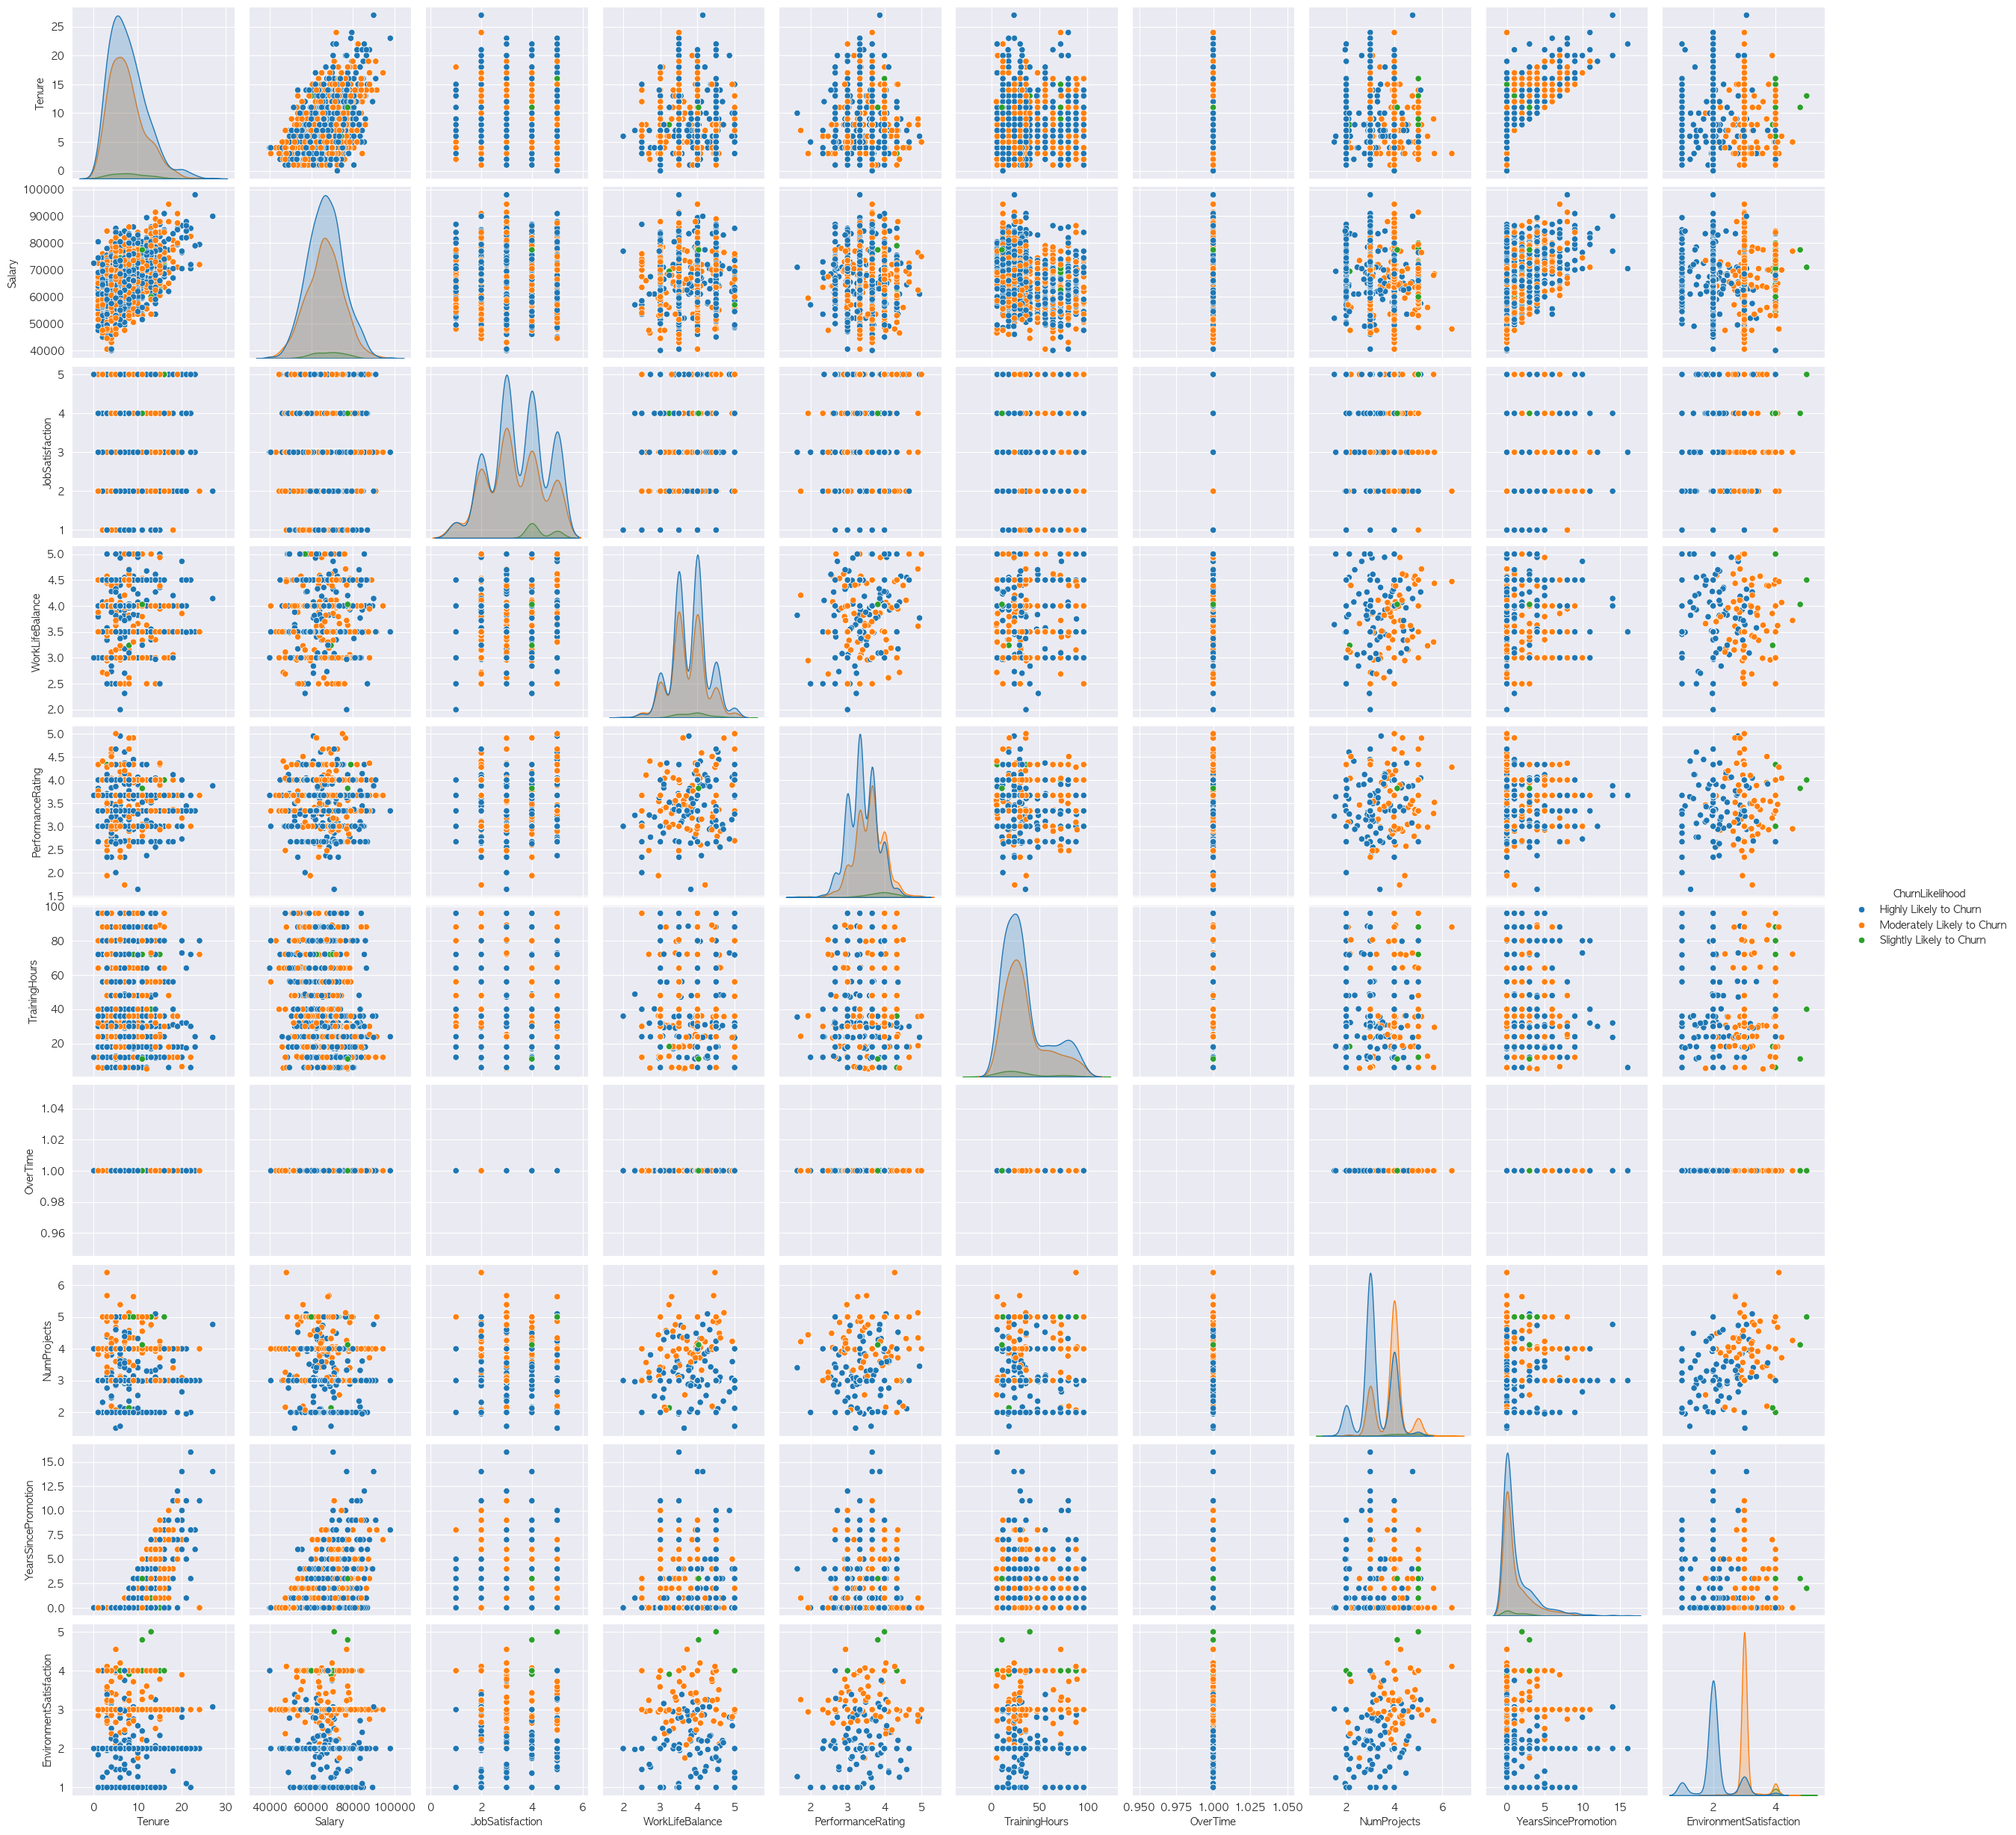

In [31]:
sns.pairplot(df, hue='ChurnLikelihood')
plt.show()

In [32]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Tenure,Salary,JobSatisfaction,WorkLifeBalance,PerformanceRating,TrainingHours,NumProjects,YearsSincePromotion,EnvironmentSatisfaction
Tenure,1.000000,0.481100,-0.045936,0.038110,-0.013251,0.024714,-0.016407,0.758942,-0.021583
Salary,0.481100,1.000000,-0.023067,0.010167,-0.047676,-0.216413,-0.025699,0.373527,-0.052849
JobSatisfaction,-0.045936,-0.023067,1.000000,0.181422,0.137309,-0.001202,-0.013514,-0.031301,-0.029527
WorkLifeBalance,0.038110,0.010167,0.181422,1.000000,0.372761,-0.008309,-0.015153,0.034821,-0.032397
PerformanceRating,-0.013251,-0.047676,0.137309,0.372761,1.000000,-0.023010,0.272016,-0.026370,0.268491
TrainingHours,0.024714,-0.216413,-0.001202,-0.008309,-0.023010,1.000000,0.020970,0.008220,0.039112
NumProjects,-0.016407,-0.025699,-0.013514,-0.015153,0.272016,0.020970,1.000000,-0.010223,0.551854
YearsSincePromotion,0.758942,0.373527,-0.031301,0.034821,-0.026370,0.008220,-0.010223,1.000000,-0.041414
EnvironmentSatisfaction,-0.021583,-0.052849,-0.029527,-0.032397,0.268491,0.039112,0.551854,-0.041414,1.000000


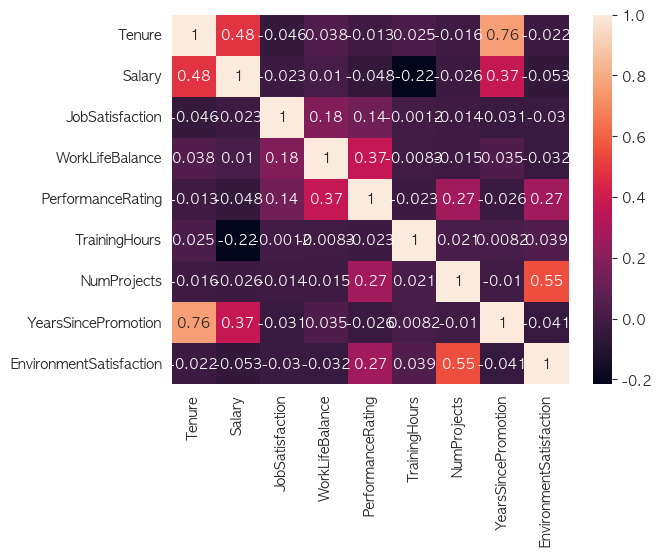

In [33]:
sns.heatmap(corr_mat, annot=True)
plt.show()

## 데이터 전처리

In [34]:
# 수치형 컬럼은 평균 또는 중앙값으로 대체
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        # 만족도 관련 컬럼 등은 중앙값, 그 외는 평균 또는 중앙값 사용
        if col in ['JobSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction']:
            df[col] = df[col].fillna(df[col].median())
        elif col == 'TrainingHours':
            df[col] = df[col].fillna(0)  # 교육 미참여로 간주
        elif col == 'NumProjects':
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())

# 범주형 컬럼은 최빈값으로 대체
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()


/var/folders/g0/d1rnqvtj3ng03716tn1zhklm0000gn/T/ipykernel_29302/3173684084.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


Branch                     0
Tenure                     0
Salary                     0
Department                 0
JobSatisfaction            0
WorkLifeBalance            0
CommuteDistance            0
PerformanceRating          0
TrainingHours              0
OverTime                   0
NumProjects                0
YearsSincePromotion        0
EnvironmentSatisfaction    0
ChurnLikelihood            0
dtype: int64